In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 29.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import  pyplot
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
df = pd.read_excel("/content/DEXINUS (1).xls")

In [ ]:
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [ ]:
df.isnull().sum()

observation_date      0
DEXINUS             494
dtype: int64

In [ ]:
#Forward Filling
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isnull().sum()

observation_date    0
DEXINUS             0
dtype: int64

In [ ]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [ ]:
for i in ['observation_date']:
    change_into_datetime(i)

In [ ]:
df.dtypes

observation_date    datetime64[ns]
DEXINUS                    float64
dtype: object

In [ ]:
df['Day']= df['observation_date'].dt.day
df['Month']= df['observation_date'].dt.month
df['Year']= df['observation_date'].dt.year

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result = adfuller(df['DEXINUS'])
test_result

(0.6320006223926236,
 0.9883783969303007,
 37,
 12611,
 {'1%': -3.4308686449575485,
  '10%': -2.56689200640251,
  '5%': -2.8617692154460714},
 -8076.628404652423)

In [ ]:
def adfuller_test(DEXINUS):
    result=adfuller(DEXINUS)
    labels=['ADF Test Statistic', 'p-values','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        if result[1]<=0.05:
            print("Reject the null hypothesis(H0).Data is stationary")
        else:
                print("Accept the null hypothesis(H0).Data is non-stationary")

In [ ]:
adfuller_test(df['DEXINUS'])

ADF Test Statistic : 0.6320006223926236
Accept the null hypothesis(H0).Data is non-stationary
p-values : 0.9883783969303007
Accept the null hypothesis(H0).Data is non-stationary
#Lags Used : 37
Accept the null hypothesis(H0).Data is non-stationary
Number of Observations Used : 12611
Accept the null hypothesis(H0).Data is non-stationary


In [ ]:
df['diff']=df['DEXINUS'].diff(periods = 1)
df

,observation_date,DEXINUS,Day,Month,Year,diff
0,1973-01-02,8.02,2,1,1973,NaN
1,1973-01-03,8.02,3,1,1973,0.00
2,1973-01-04,8.00,4,1,1973,-0.02
3,1973-01-05,8.01,5,1,1973,0.01
4,1973-01-08,8.00,8,1,1973,-0.01
...,...,...,...,...,...,...
12644,2021-06-21,74.18,21,6,2021,0.04
12645,2021-06-22,74.37,22,6,2021,0.19
12646,2021-06-23,74.13,23,6,2021,-0.24
12647,2021-06-24,74.14,24,6,2021,0.01


In [ ]:
adfuller_test(df['diff'].dropna())

ADF Test Statistic : -19.055602597887876
Reject the null hypothesis(H0).Data is stationary
p-values : 0.0
Reject the null hypothesis(H0).Data is stationary
#Lags Used : 36
Reject the null hypothesis(H0).Data is stationary
Number of Observations Used : 12611
Reject the null hypothesis(H0).Data is stationary


In [ ]:
del df['diff']

In [ ]:
train=df.iloc[:12529]
test=df.iloc[12529:]

In [ ]:
# llr test
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(df.DEXINUS, order = (1,0))

In [ ]:
results = model.fit(disp = 0)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                DEXINUS   No. Observations:                12649
Model:                     ARMA(1, 0)   Log Likelihood                3999.248
Method:                       css-mle   S.D. of innovations              0.176
Date:                Thu, 19 Aug 2021   AIC                          -7992.496
Time:                        15:10:35   BIC                          -7970.160
Sample:                             0   HQIC                         -7985.023
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.9882        nan        nan        nan         nan         nan
ar.L1.DEXINUS     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#Higher-Lag AR Models for Returns
model = ARMA(df.DEXINUS, order = (1,0))

In [ ]:
results = model.fit(disp = 0)

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                DEXINUS   No. Observations:                12649
Model:                     ARMA(1, 0)   Log Likelihood                3999.248
Method:                       css-mle   S.D. of innovations              0.176
Date:                Thu, 19 Aug 2021   AIC                          -7992.496
Time:                        15:10:41   BIC                          -7970.160
Sample:                             0   HQIC                         -7985.023
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.9882        nan        nan        nan         nan         nan
ar.L1.DEXINUS     1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
LLR_test(model,model)

1.0

In [ ]:
predict=results.predict(start=len(train), end=len(train)+len(test)-1,dynamic=False)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print("root mean square error",mean_squared_error(test.DEXINUS, predict))

root mean square error 0.061962500591714535


In [ ]:
data=pd.DataFrame({'test':test.DEXINUS,'prediction':predict})
data

,test,prediction
12529,73.50,73.31
12530,73.26,73.50
12531,73.07,73.26
12532,73.11,73.07
12533,73.08,73.11
...,...,...
12644,74.18,74.14
12645,74.37,74.18
12646,74.13,74.37
12647,74.14,74.13


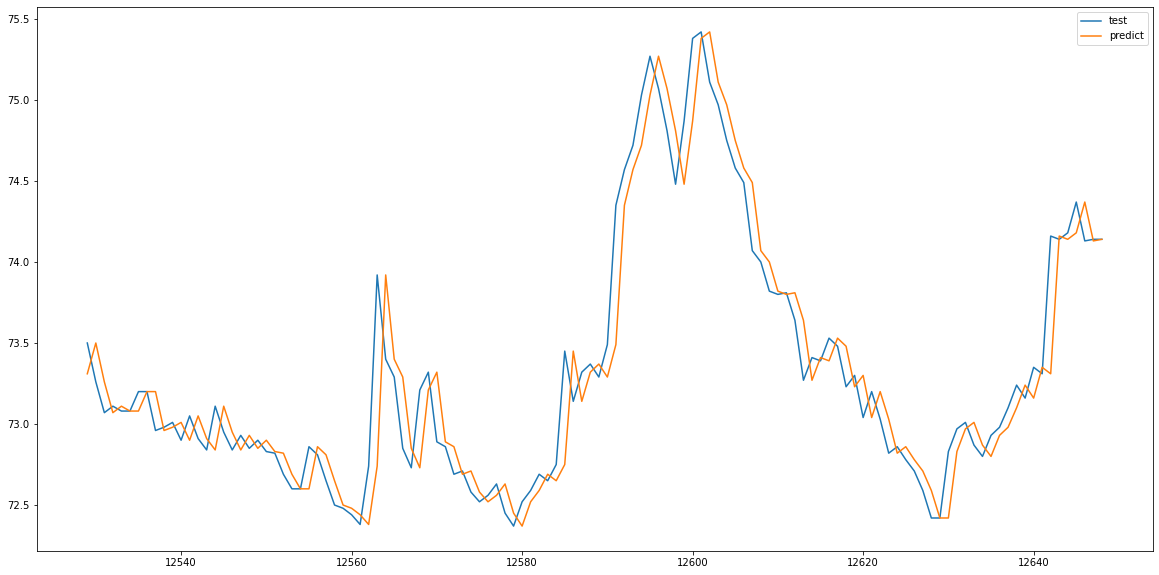

In [ ]:
#train.Dexinus.plot(legend=True,label="train")
test.DEXINUS.plot(legend=True,label="test")
predict.plot(legend=True,label="predict",figsize=(20,10))

In [ ]:
# Future data
future_dates = pd.date_range(start = df.observation_date.max() + pd.DateOffset(1), end = df.observation_date.max() + pd.DateOffset(30), freq = 'D')
Future= pd.DataFrame()
Future['Month'] = [i.month for i in future_dates]
Future['Year'] = [i.year for i in future_dates]
Future['Day'] = [i.day for i in future_dates]

In [ ]:
future_dates

DatetimeIndex(['2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03',
               '2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-17', '2021-07-18', '2021-07-19',
               '2021-07-20', '2021-07-21', '2021-07-22', '2021-07-23',
               '2021-07-24', '2021-07-25'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
df_future=pd.concat([df,future_dates_df])
len(df_future)

12678

In [ ]:
df.tail()

,observation_date,DEXINUS,Day,Month,Year
12644,2021-06-21,74.18,21,6,2021
12645,2021-06-22,74.37,22,6,2021
12646,2021-06-23,74.13,23,6,2021
12647,2021-06-24,74.14,24,6,2021
12648,2021-06-25,74.14,25,6,2021


In [ ]:
predictfuture=results.predict(start=12649, end=len(df_future)+1,dynamic=False)

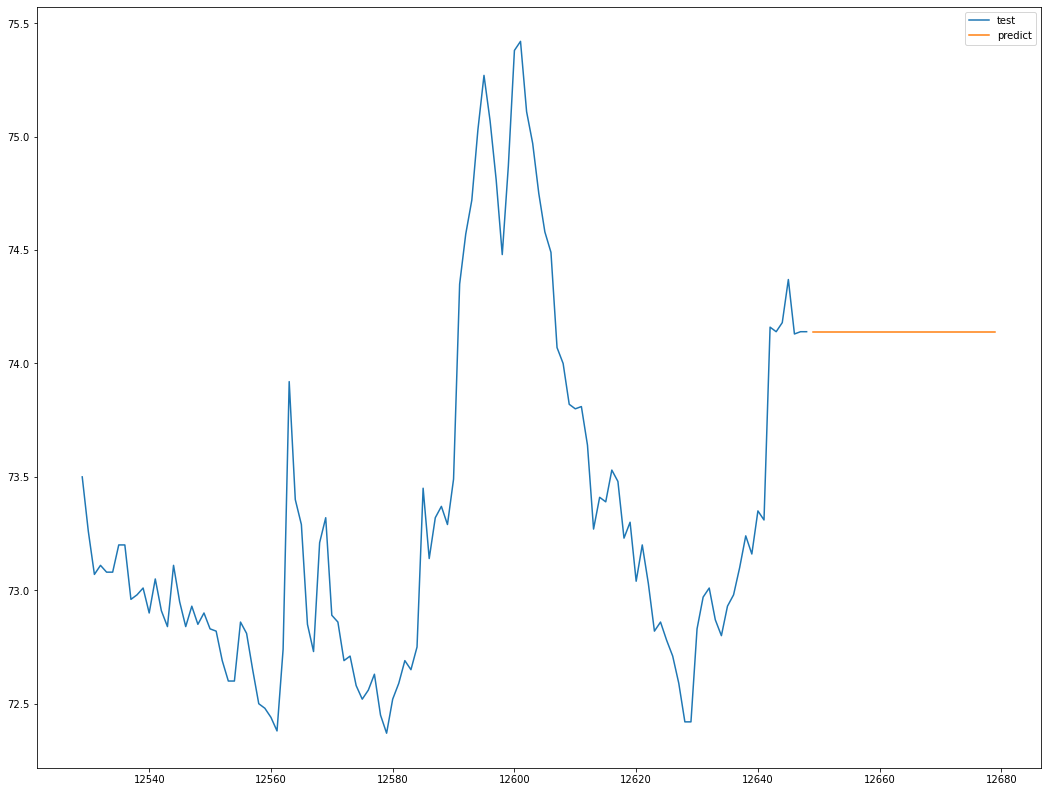

In [ ]:
#train_df.DEXINUS.plot(legend=True,label="Train")
test.DEXINUS.plot(legend=True,label="test",figsize=(18,14))
predictfuture.plot(legend=True,label='predict')

In [ ]:
predictfuture.head(60)

12649    74.140000
12650    74.140000
12651    74.140000
12652    74.140000
12653    74.140000
12654    74.140000
12655    74.140000
12656    74.140000
12657    74.140000
12658    74.139999
12659    74.139999
12660    74.139999
12661    74.139999
12662    74.139999
12663    74.139999
12664    74.139999
12665    74.139999
12666    74.139999
12667    74.139999
12668    74.139999
12669    74.139999
12670    74.139999
12671    74.139999
12672    74.139999
12673    74.139999
12674    74.139999
12675    74.139999
12676    74.139999
12677    74.139998
12678    74.139998
12679    74.139998
dtype: float64